<a href="https://colab.research.google.com/github/subhit-coder/Healthcare-Patient-Data-Analysis/blob/main/health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [223]:
df=pd.read_csv('synthetic_healthcare_patient_data.csv')

In [224]:
df.head()

,Patient_ID,Name,Age,Gender,Disease,Treatment_Cost,Recovery_Days
0,P0001,Meena Patel,74,Male,Heart Disease,26140,47
1,P0002,Ravi Kumar,32,Female,Migraine,6325,9
2,P0003,Meena Chopra,89,Female,Cancer,92592,116
3,P0004,Deepak Mishra,82,Female,Cancer,59347,108
4,P0005,Anil Gupta,22,Male,Thyroid,8069,17


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      1000 non-null   object
 1   Name            1000 non-null   object
 2   Age             1000 non-null   int64 
 3   Gender          1000 non-null   object
 4   Disease         1000 non-null   object
 5   Treatment_Cost  1000 non-null   int64 
 6   Recovery_Days   1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [226]:
df.columns #'Patient_ID', 'Age', 'Gender', , 'Treatment_Cost','Recovery_Days-----numeric columns
           # other two categorical columns



Index(['Patient_ID', 'Name', 'Age', 'Gender', 'Disease', 'Treatment_Cost',
       'Recovery_Days'],
      dtype='object')

In [227]:
df.isna().sum()


,0
Patient_ID,0
Name,0
Age,0
Gender,0
Disease,0
Treatment_Cost,0
Recovery_Days,0


In [228]:
df.duplicated().sum()

np.int64(0)

<Axes: ylabel='Treatment_Cost'>

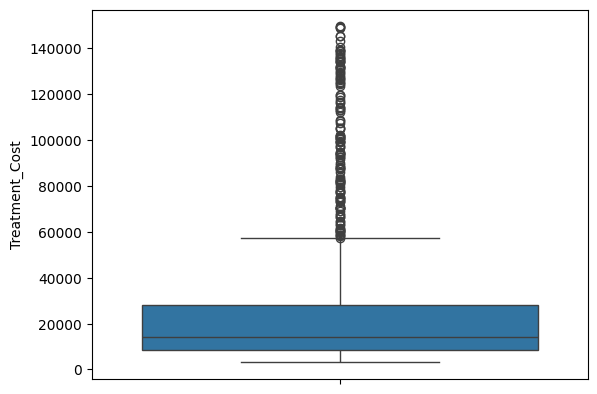

In [229]:
sns.boxplot(df['Treatment_Cost'])    # many outlayers heree but it is ectuly outliers

<Axes: ylabel='Recovery_Days'>

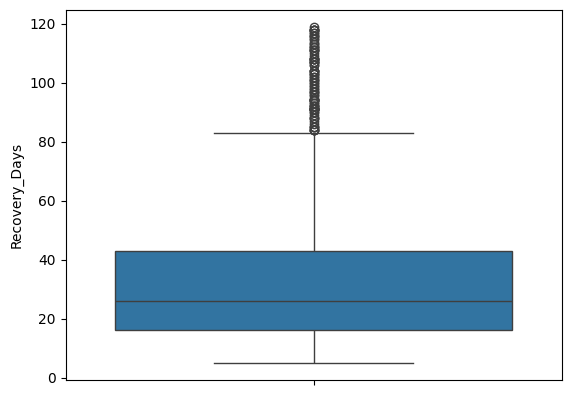

In [230]:
sns.boxplot(df['Recovery_Days'])  # real outliers haya ye



In [231]:
del df['Name'] # analysis ke liye name ki jarurt nhi hay

In [232]:
del df['Patient_ID'] # same parent id ki bhi jarurt nhi hay

In [233]:
df.head()

,Age,Gender,Disease,Treatment_Cost,Recovery_Days
0,74,Male,Heart Disease,26140,47
1,32,Female,Migraine,6325,9
2,89,Female,Cancer,92592,116
3,82,Female,Cancer,59347,108
4,22,Male,Thyroid,8069,17


In [234]:
df['Gender'].value_counts()

,count
Gender,
Female,512
Male,488


In [235]:
df.shape

(1000, 5)

EDA (Feature Exploration)

Text(0.5, 1.0, 'Age Distribution')

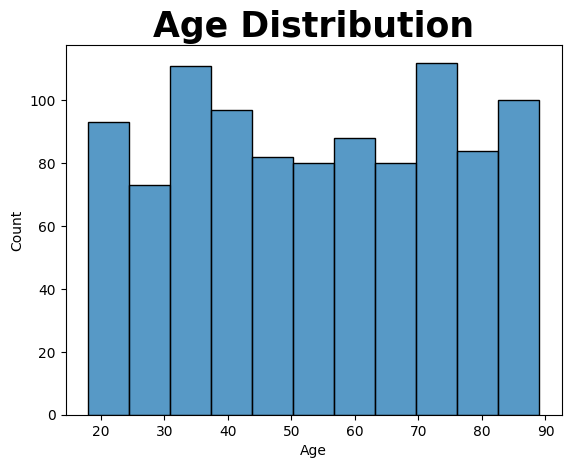

In [236]:
sns.histplot(df['Age'])
plt.title('Age Distribution',fontdict={'fontsize':25, 'color':'black', 'weight':'black'})    # maximum log ki age 20 se 80 k3 beech hy


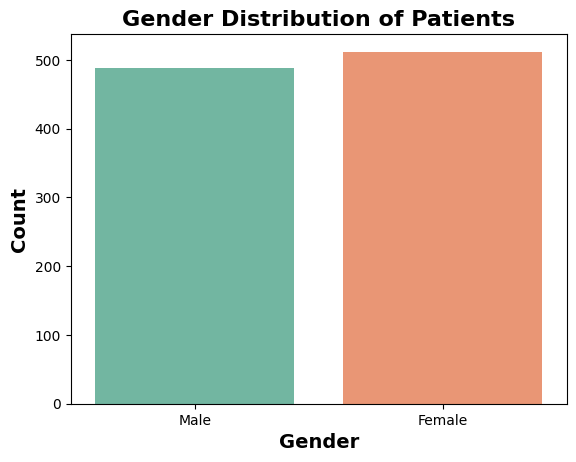

In [237]:
sns.countplot(x='Gender', data=df, palette='Set2')
plt.xlabel("Gender",fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.ylabel("Count",fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.title("Gender Distribution of Patients",fontdict={'fontsize':16, 'color':'black', 'weight':'black'})
plt.show()


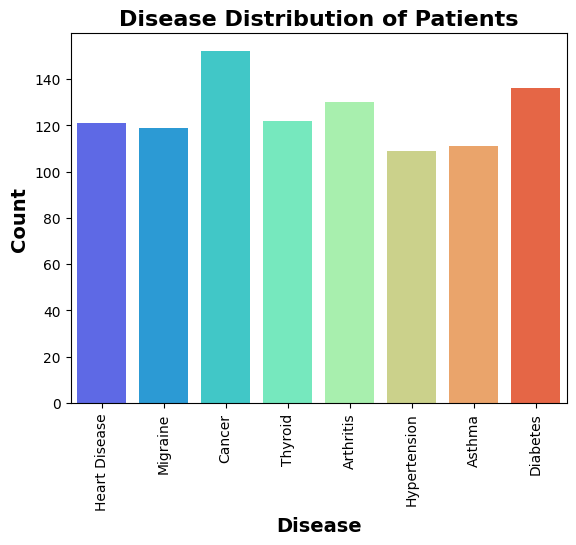

In [238]:
sns.countplot(x='Disease',data=df,palette='rainbow')
plt.xlabel("Disease",fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.ylabel("Count",fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.xticks(rotation=90)
plt.title("Disease Distribution of Patients",fontdict={'fontsize':16, 'color':'black', 'weight':'black'})
plt.show()

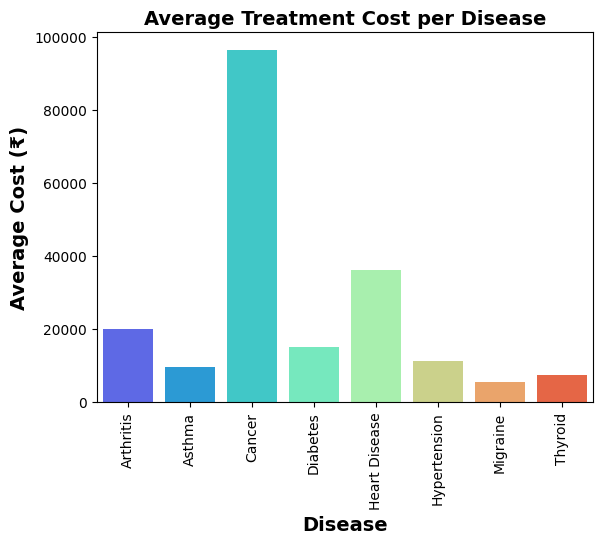

In [239]:
avg_cost_per_disease = df.groupby('Disease')['Treatment_Cost'].mean()
sns.barplot(x=avg_cost_per_disease.index, y=avg_cost_per_disease.values,palette='rainbow')
plt.title("Average Treatment Cost per Disease", fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.xlabel("Disease", fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.xticks(rotation=90)
plt.ylabel("Average Cost (₹)",fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.show()



<Axes: xlabel='Recovery_Days', ylabel='Count'>

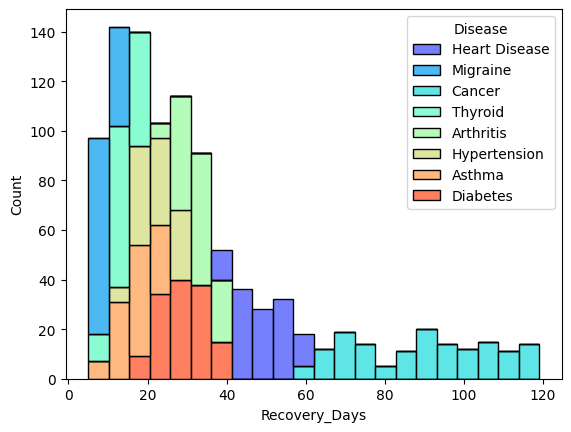

In [240]:
sns.histplot(x='Recovery_Days', hue='Disease', data=df, multiple='stack', palette='rainbow')

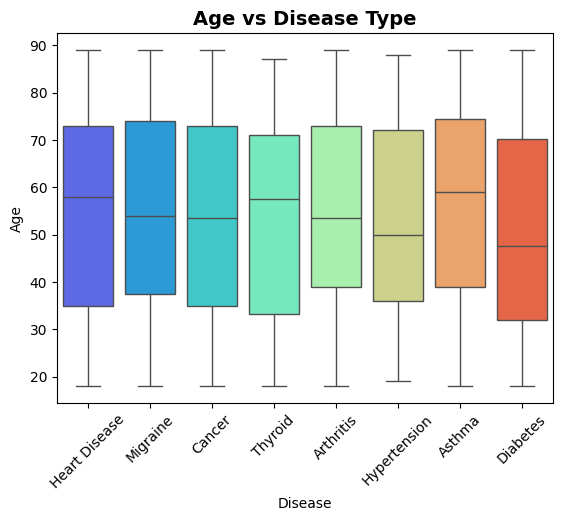

In [241]:
sns.boxplot(x='Disease', y='Age', data=df,palette='rainbow')
plt.title("Age vs Disease Type", fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.xticks(rotation=45)
plt.show()

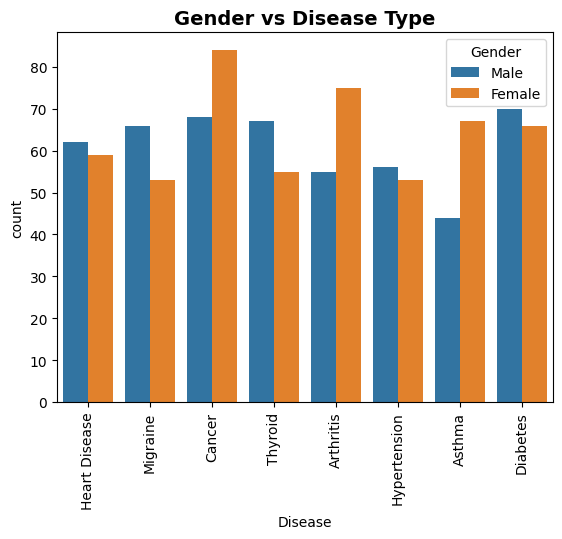

In [245]:
sns.countplot(x='Disease', hue='Gender', data=df)
plt.title("Gender vs Disease Type",fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.xticks(rotation=90,)
plt.show()

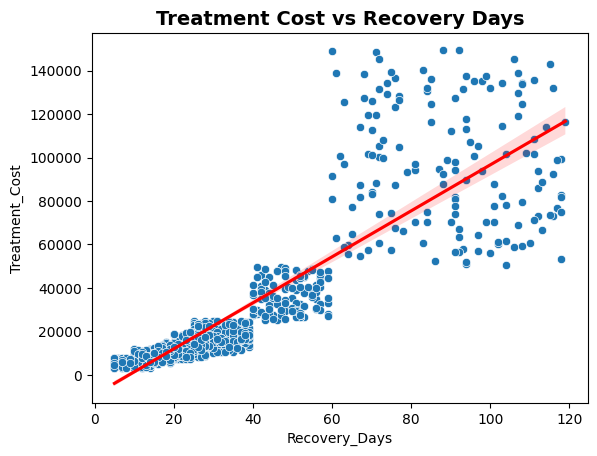

In [253]:
sns.scatterplot(x='Recovery_Days', y='Treatment_Cost', data=df)
sns.regplot(x='Recovery_Days', y='Treatment_Cost', data=df, scatter=False, color='red')
plt.title("Treatment Cost vs Recovery Days",fontdict={'fontsize':14, 'weight':'bold', 'color':'black'})
plt.show()

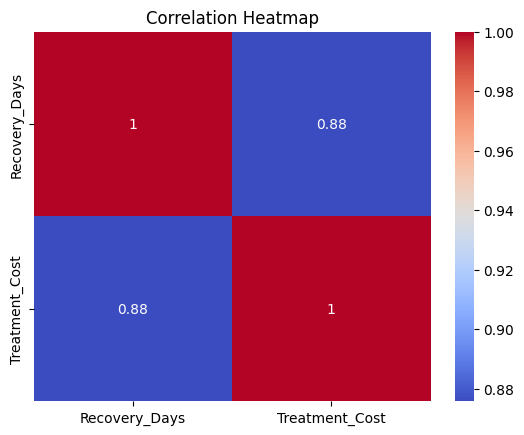

In [255]:
corr = df[['Recovery_Days','Treatment_Cost']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [256]:
df.groupby(['Disease','Gender'])['Treatment_Cost'].mean()   #Doctor A: 'Male patients spend more on Heart Disease treatment than females.'    $right$

Disease        Gender
Arthritis      Female    19972.666667
               Male      20082.836364
Asthma         Female     9506.507463
               Male       9567.386364
Cancer         Female    98934.738095
               Male      93392.279412
Diabetes       Female    15200.318182
               Male      15184.857143
Heart Disease  Female    36278.796610
               Male      36079.709677
Hypertension   Female    11308.452830
               Male      11239.000000
Migraine       Female     5389.981132
               Male       5636.954545
Thyroid        Female     7480.800000
               Male       7395.671642
Name: Treatment_Cost, dtype: float64

In [258]:
df.groupby('Disease')['Recovery_Days'].mean()    #Doctor B: 'Arthritis patients have longer recovery times compared to Asthma patients      right

,Recovery_Days
Disease,
Arthritis,31.838462
Asthma,17.270270
Cancer,89.631579
Diabetes,28.911765
Heart Disease,48.859504
Hypertension,21.917431
Migraine,9.008403
Thyroid,14.393443


In [263]:
df.groupby('Disease')['Treatment_Cost'].mean()      #Doctor C: 'Cancer treatment is the most expensive across all age groups.'    right


,Treatment_Cost
Disease,
Arthritis,20019.276923
Asthma,9530.639640
Cancer,96455.217105
Diabetes,15192.360294
Heart Disease,36176.785124
Hypertension,11272.770642
Migraine,5526.957983
Thyroid,7434.049180


In [265]:
df.groupby('Gender')['Treatment_Cost'].mean()

,Treatment_Cost
Gender,
Female,29073.310547
Male,25969.284836


In [266]:
df.groupby("Disease")['Treatment_Cost'].mean()


,Treatment_Cost
Disease,
Arthritis,20019.276923
Asthma,9530.639640
Cancer,96455.217105
Diabetes,15192.360294
Heart Disease,36176.785124
Hypertension,11272.770642
Migraine,5526.957983
Thyroid,7434.049180
